In [1]:
%load_ext autoreload
%autoreload 2
from dataloaders import get_stl10_dataloader, get_imnet_dataloader
from ttach.ttach.augmentation_transforms_hpy import ALL_TRANSFORMS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')

bs = 64
im_size = 96
dataloader = get_imnet_dataloader("/data/ddmg/neuro/datasets/ILSVRC2012/val", batch_size=bs)

In [2]:
# Creating a transform function for each level
n_transforms = len(ALL_TRANSFORMS)
n_levels = 10
levels = np.arange(n_levels)
all_transform_fs = []
for transform in ALL_TRANSFORMS:
    for level in levels:
        transform_f = transform.pil_transformer(1.0,level,im_size)
        all_transform_fs.append(transform_f) 

In [3]:
# List of all augmentations
', '.join(list(set([all_transform_fs[i].name[:-7] for i in range(len(all_transform_fs))])))

'Color, Blur, Posterize, ShearX, Smooth, CropBilinear, FlipLR, Solarize, TranslateX, Invert, ShearY, Rotate, TranslateY, AutoContrast, Cutout, Brightness, Equalize, Contrast, FlipUD, Sharpness'

Augmentation:  FlipLR


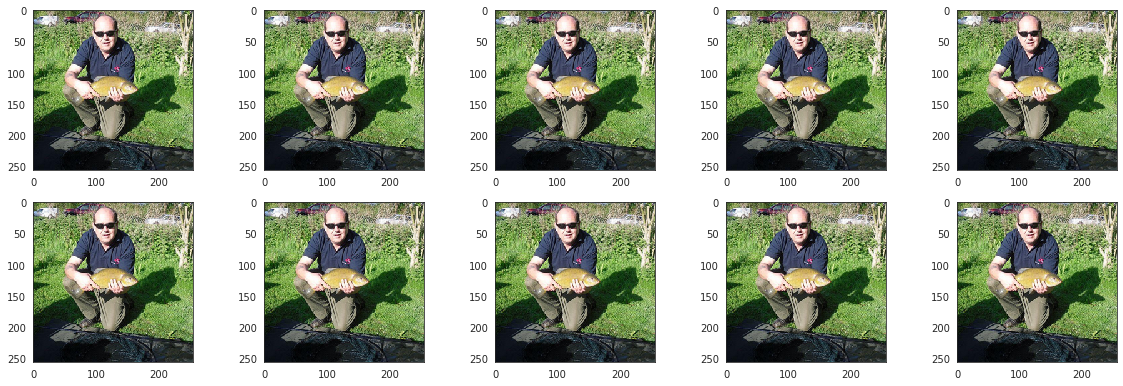

In [11]:
# Visualize 10 Settings
from torchvision import transforms
import torch
aug_name= 'FlipLR'
aug_transforms = [transform for transform in all_transform_fs if (aug_name in transform.name)]
x_batch, y_batch = iter(dataloader).next()

std = (0.229, 0.224, 0.225)
mean = (0.485, 0.456, 0.406)
img = x_batch[np.random.choice(len(x_batch))]
img_u = img * torch.tensor(std).view(3, 1, 1)
img_u = img_u + torch.tensor(mean).view(3, 1, 1)
img_pil = transforms.ToPILImage()(img_u)

new_imgs = [aug_transforms[i](img_pil) for i in range(len(aug_transforms))]
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(new_imgs):
    plt.subplot(len(new_imgs) / columns + 1, columns, i + 1)
    plt.imshow(img_pil)

print("Augmentation: ", aug_name)

In [21]:
# go back 

gg = transforms.ToTensor()(img_pil)
img_u = gg - torch.tensor(mean).view(3, 1, 1)
gg = img_u / torch.tensor(std).view(3, 1, 1)
img

tensor([[[-0.3541, -0.6794, -0.9363,  ...,  0.7248,  0.4851, -1.0733],
         [-0.8849, -0.6281, -0.7650,  ...,  1.5639, -0.6623, -0.9534],
         [-0.5596, -0.8335, -0.8678,  ..., -0.7650, -0.4739, -0.5938],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.1760, -1.2445, -1.1418],
         [-1.9295, -1.9295, -1.9295,  ..., -1.1932, -1.2274, -1.2274],
         [-1.9124, -1.9295, -1.9295,  ..., -1.2445, -1.1418, -1.1247]],

        [[ 0.1877, -0.0574, -0.3375,  ...,  1.0805,  0.7479, -0.8803],
         [-0.3550, -0.0224, -0.1625,  ...,  1.8158, -0.4601, -0.7227],
         [-0.0749, -0.2850, -0.2675,  ..., -0.7227, -0.3025, -0.3025],
         ...,
         [-1.7731, -1.7731, -1.7731,  ..., -0.8978, -0.9328, -0.8277],
         [-1.7731, -1.7731, -1.7731,  ..., -0.8803, -0.9153, -0.9503],
         [-1.7556, -1.7731, -1.7731,  ..., -0.9328, -0.8277, -0.8277]],

        [[-0.2707, -0.8284, -1.0201,  ...,  1.0539,  0.9494, -0.6890],
         [-0.8633, -0.7761, -0.8458,  ...,  2

In [112]:
# 20 transforms total: 
    # 'Posterize, TranslateY, Brightness, ShearY, Color, FlipLR, 
    #  ShearX, FlipUD, Equalize, Contrast, Blur, Rotate, TranslateX, 
    #  AutoContrast, Invert, Solarize, Smooth, Cutout, CropBilinear, Sharpness'
# 7 transforms have one setting: 
    # Equalize, Autocontrast, FlipLR, FlipUD, Invert, Smooth, Cutout
# The other 13 have 10 settings, set according to the AutoAugment paper 
# In total, this means there are 137 unique perturbations to each image that we evaluate

20

In [ ]:
{'Posterize': 10, 'TranslateY': 20: , 'Brightness': 30, 'ShearY': 40, 'Color': 50, 'FlipLR': 60, 
 'ShearX': 70, 'FlipUD': 80, 'Equalize': 90, 
        'Contrast': 100, 'Blur': 110, 'Rotate': 120, 
        'TranslateX': 130, 'AutoContrast': 140, 'Invert': 150, 
        'Solarize':160, 'Smooth':170, 'Cutout':180, 
        'CropBilinear':190, 'Sharpness':0}